In [3]:


import numpy as np 
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os


In [4]:
#importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import string, os
import nltk
import re
import random
import io

import sys
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image, ImageDraw, ImageFont
import warnings
warnings.filterwarnings("ignore")


<a id="2"></a>
# <p style="background-color:#B291B6;font-family:newtimeroman;color:#444160;font-size:150%;text-align:center;border-radius:20px 60px;">LOADING DATA</p>
For this project, I have prepared a dataset of song lyrics. Let's load it and have a look.

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
data = pd.read_csv("/content/drive/MyDrive/LSML2/metal_lyrics.csv", encoding='utf8' )
data.head()

,Artist,Album,Song,Lyric,SongNum,Year
0,...AAAARRGHH,aaaarrghh,_Gecenin_G__lgesi,Kara bulutlar sardГ„В± yine dГѓВјnyamГ„В±\nKГ„...,1,0
1,...AAAARRGHH,aaaarrghh,_Son___afak,Dolunay parlak gГѓВ¶rГѓВјnmГѓВјyor bu gece\nBe...,2,0
2,...AAAARRGHH,aaaarrghh,_F__rt__na_Yakla__yyor...,Ay Г„В±Г…ВџГ„В±Г„ВџГ„В±nГ„В±n altГ„В±nda\nYaln...,3,0
3,...AAAARRGHH,aaaarrghh,_Ebedi_Buzulun_Ortas__nda,Ay Г„В±Г…ВџГ„В±Г„ВџГ„В±nГ„В±n altГ„В±nda\nYaln...,4,0
4,...AAAARRGHH,aaaarrghh,_Lanetli_Diyarlar,YГѓВјrГѓВјyorum yalnГ„В±z baГ…ВџГ„В±ma\nNereye...,5,0


<a id="3"></a>
# <p style="background-color:#B291B6;font-family:newtimeroman;color:#444160;font-size:150%;text-align:center;border-radius:20px 60px;">DATA EXPLORATION</p>

**In this section, I will be:**
* Exploring how noisy is the dataset, does it contains other languages etc
* Explore the various words in lyrics via wordcloud 

In [8]:
#Printing the names of artists in the lyrics data
print("Artists in the data:\n",data.Artist.value_counts()) 

Artists in the data:
 UNHOLY GRAVE       646
JUDAS PRIEST       357
nasum              345
AGATHOCLES         343
SAMSAS TRAUM       336
                  ... 
sohraab              1
awakethedreamer      1
shiningnorway        1
yourbadkarma         1
krashriders          1
Name: Artist, Length: 7461, dtype: int64


In [9]:
#Printing the size of dataset
print("Size of Dataset:",data.shape)

Size of Dataset: (228288, 6)



**I will do a little feature engineering to extract more information on the songs such as:**
* Number of characters
* Number of words
* Number of lines

In [10]:
# Dropping unneeded features. 

data.drop(['Album','Song', 'SongNum', 'Year'],axis=1,inplace=True)


In [11]:
data.head(1)

,Artist,Lyric
0,...AAAARRGHH,Kara bulutlar sardГ„В± yine dГѓВјnyamГ„В±\nKГ„...


In [12]:
# The lyrics looks like Turkish language 
data.iloc[0]['Lyric']

'Kara bulutlar sardГ„В± yine dГѓВјnyamГ„В±\nKГ„В±Г…Вџ yerleГ…Вџti ruhuma\nGГѓВјneГ…Вџ asГ„В±lГ„В±ysa da gГѓВ¶kyГѓВјzГѓВјnde\nRГѓВјzgarlar dondurdu kalbimi\n\nAy ve yГ„В±ldГ„В±zlar bir yana\nKaranlГ„В±k bile ГѓВ§ekip gitti\nГѓВ–lГѓВјm kokan bir mezara\nYalnГ„В±zlГ„В±k gГѓВ¶mdГѓВј beni\n\n'

In [13]:
# Getting rid of almost empty values. The data itself contatins a lot of noise. I had many different errors while prerpocessing it. Let's convert Lyris to string 
data['Lyric_STR'] = data['Lyric'].astype(str)

data.drop(['Lyric'],axis=1,inplace=True)


In [14]:
data.head(1)

,Artist,Lyric_STR
0,...AAAARRGHH,Kara bulutlar sardГ„В± yine dГѓВјnyamГ„В±\nKГ„...


In [15]:
# Keep getting an error LangDetectException: No features in text./ Means some strings may not even contatin letters 

#Adding a column of numbers of Characters,words and sentences in each msg
data["No_of_Characters"] = data["Lyric_STR"].apply(len)
data.head(5)


,Artist,Lyric_STR,No_of_Characters
0,...AAAARRGHH,Kara bulutlar sardГ„В± yine dГѓВјnyamГ„В±\nKГ„...,277
1,...AAAARRGHH,Dolunay parlak gГѓВ¶rГѓВјnmГѓВјyor bu gece\nBe...,471
2,...AAAARRGHH,Ay Г„В±Г…ВџГ„В±Г„ВџГ„В±nГ„В±n altГ„В±nda\nYaln...,660
3,...AAAARRGHH,Ay Г„В±Г…ВџГ„В±Г„ВџГ„В±nГ„В±n altГ„В±nda\nYaln...,660
4,...AAAARRGHH,YГѓВјrГѓВјyorum yalnГ„В±z baГ…ВџГ„В±ma\nNereye...,516


In [16]:
data.describe()

# No_of_Characters is too small in some cases. Let's take a closer look what data it is 

,No_of_Characters
count,228288.000000
mean,792.021359
std,557.150020
min,1.000000
25%,462.000000
50%,764.000000
75%,1078.000000
max,36870.000000


In [17]:
small_number_of_caracters = data.drop(data[data['No_of_Characters'] > 30].index)

In [18]:
small_number_of_caracters.head(5)

,Artist,Lyric_STR,No_of_Characters
7,...AND OCEANS,[GGFH cover]\n\n,14
16,...AND OCEANS,[instrumental]\n\n,16
17,...AND OCEANS,[instrumental]\n\n\n\n\n,19
63,A-I-E-A,[Instrumental]\n\n\n\n,18
64,A.C.O.D,\n,1


In [19]:
# Let's get rid of it
data = data.drop(data[data['No_of_Characters'] < 30].index)

In [20]:
data.describe()

,No_of_Characters
count,201481.000000
mean,896.446945
std,508.768161
min,30.000000
25%,584.000000
50%,829.000000
75%,1127.000000
max,36870.000000


In [21]:
data.head()
# Still needs a language detection

,Artist,Lyric_STR,No_of_Characters
0,...AAAARRGHH,Kara bulutlar sardГ„В± yine dГѓВјnyamГ„В±\nKГ„...,277
1,...AAAARRGHH,Dolunay parlak gГѓВ¶rГѓВјnmГѓВјyor bu gece\nBe...,471
2,...AAAARRGHH,Ay Г„В±Г…ВџГ„В±Г„ВџГ„В±nГ„В±n altГ„В±nda\nYaln...,660
3,...AAAARRGHH,Ay Г„В±Г…ВџГ„В±Г„ВџГ„В±nГ„В±n altГ„В±nda\nYaln...,660
4,...AAAARRGHH,YГѓВјrГѓВјyorum yalnГ„В±z baГ…ВџГ„В±ma\nNereye...,516


In [22]:
# Keep getting an error LangDetectException. Let's write a function to help. 
def checkString(str):
 
    # initializing flag variable
    flag_l = False
 
    # checking for letter and numbers in
    # given string
    for i in str:
 
        # if string has letter
        if i.isalpha():
            flag_l = True

 
    # returning and of flag
    # for checking required condition
    return flag_l

In [23]:
data['Contains_letter'] = data['Lyric_STR'].apply(checkString)
data.head()

,Artist,Lyric_STR,No_of_Characters,Contains_letter
0,...AAAARRGHH,Kara bulutlar sardГ„В± yine dГѓВјnyamГ„В±\nKГ„...,277,True
1,...AAAARRGHH,Dolunay parlak gГѓВ¶rГѓВјnmГѓВјyor bu gece\nBe...,471,True
2,...AAAARRGHH,Ay Г„В±Г…ВџГ„В±Г„ВџГ„В±nГ„В±n altГ„В±nda\nYaln...,660,True
3,...AAAARRGHH,Ay Г„В±Г…ВџГ„В±Г„ВџГ„В±nГ„В±n altГ„В±nda\nYaln...,660,True
4,...AAAARRGHH,YГѓВјrГѓВјyorum yalnГ„В±z baГ…ВџГ„В±ma\nNereye...,516,True


In [24]:
data.shape

(201481, 4)

In [25]:
# Letting only TRUE values
data = data[data.Contains_letter]


In [26]:
# See, the size of data have changed. Those 4 rows were givinf an error while processing 
data.shape


(201478, 4)

Getting rid of non-english lyrics. I need to detect language first. 

In [27]:
!pip install langdetect

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 981 kB 4.5 MB/s 
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993241 sha256=f77148d1c3bfe49e34d64845154a5f7cff4bb66dc186b395e5f610093fc8dc9e
  Stored in directory: /root/.cache/pip/wheels/c5/96/8a/f90c59ed25d75e50a8c10a1b1c2d4c402e4dacfa87f3aff36a
Successfully built langdetect


In [28]:
# Removing non-English lyrics

from langdetect import detect

data['Lyric_detected_language'] = data['Lyric_STR'].apply(detect)





In [29]:
data.head(15)
# Wonderful 

,Artist,Lyric_STR,No_of_Characters,Contains_letter,Lyric_detected_language
0,...AAAARRGHH,Kara bulutlar sardГ„В± yine dГѓВјnyamГ„В±\nKГ„...,277,True,tr
1,...AAAARRGHH,Dolunay parlak gГѓВ¶rГѓВјnmГѓВјyor bu gece\nBe...,471,True,tr
2,...AAAARRGHH,Ay Г„В±Г…ВџГ„В±Г„ВџГ„В±nГ„В±n altГ„В±nda\nYaln...,660,True,tr
3,...AAAARRGHH,Ay Г„В±Г…ВџГ„В±Г„ВџГ„В±nГ„В±n altГ„В±nda\nYaln...,660,True,tr
4,...AAAARRGHH,YГѓВјrГѓВјyorum yalnГ„В±z baГ…ВџГ„В±ma\nNereye...,516,True,tr
5,...AND OCEANS,Open the white doors\nTo the field of thoughts...,377,True,en
6,...AND OCEANS,"Etsin nutta pelkoa, syvyytta\nMutta en ainoast...",610,True,fi
8,...AND OCEANS,[Originally performed by Bloodthorn]\n\nDrops ...,685,True,en
9,...AND OCEANS,Electro eroticism\nIntelligence is sexy\nElect...,539,True,en
10,...AND OCEANS,Inhale/exhale\nInhale the exhaled\nInhale/exha...,502,True,en


In [32]:
data.drop(['No_of_Characters','Contains_letter'],axis=1,inplace=True)


In [33]:
# Removing non-english data

data = data.drop(data[data['Lyric_detected_language'] != 'en'].index)

data.head(15)

,Artist,Lyric_STR,Lyric_detected_language
5,...AND OCEANS,Open the white doors\nTo the field of thoughts...,en
8,...AND OCEANS,[Originally performed by Bloodthorn]\n\nDrops ...,en
9,...AND OCEANS,Electro eroticism\nIntelligence is sexy\nElect...,en
10,...AND OCEANS,Inhale/exhale\nInhale the exhaled\nInhale/exha...,en
11,...AND OCEANS,Under the dark sky we stand\nUnder heavy rain ...,en
12,...AND OCEANS,"Seducer sun shine on me\nFamiliar scene, fever...",en
13,...AND OCEANS,The black iris devours pictures in silence\nTh...,en
14,...AND OCEANS,Night swells to distant spheres\nSilent throat...,en
15,...AND OCEANS,Opulent kinetic sculptures\nVisualized voices ...,en
18,...AND OCEANS,The nights fall and skies fall\nDown here we t...,en


In [34]:
# Detecting language took a lot of time. I am saving it as new csv file for future 
data.to_csv('data_with_language.csv', index=False)
import csv

# Here I ust  saved  the progress, because detecting language per each row takes a LOT of time

# data = pd.read_csv("/content/data_with_language.csv",  index_col=None)
# data.head()

In [38]:
# Clean from /n and other stufff 
def check_line(text):
  if len(text) < 5: return False
  black_list = ['\x03', '\x05', '\t', '\n', '\x0c', '\x10', '\x19', '#', '$', '%', '&', '(', ')', '*', '+', '<', '>', '_', '/', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '=', '@', '[', '\\', ']', '^', '{', '|', '}', '~', '\x7f', '\xa0', '¤', '¦', '§', '©', '«', '¬', '\xad', '®', '°', '±', 'µ', '¶', '·', '»', 'в', 'г', 'д', 'к', 'о', 'п', 'ш', 'щ', 'ё', 'ђ', 'ѓ', 'є', 'ї', 'љ', 'њ', 'ћ', 'ќ', 'ў', 'џ', 'ґ', '†', '‡', '•', '‰', '‹', '›', '€', '№', '™']
  for ch in black_list:
    if ch in text: return False
  return True

def clean_line(text):
  return re.sub("[^A-Za-z0-9\ \n]","",text.lower())
  
def clean_song(text):
  lines = text.split('\n')
  lines = [clean_line(l) for l in lines if check_line(l)] 
  return ' '.join(lines)



In [60]:
data['Lyrics'] = data['Lyric_STR'].apply(clean_song)



In [61]:
data['Lyrics'].head(2)

5    open the white doors to the field of thoughts ...
8    drops of new gleaming in the flesh new morning...
Name: Lyrics, dtype: object

In [47]:
# data.drop(['Lyric_detected_language'],axis=1,inplace=True)


In [48]:
data.head(1)

,Artist,Lyric_STR,Lyrics
5,...AND OCEANS,Open the white doors\nTo the field of thoughts...,open the white doors to the field of thoughts ...


In [49]:
# One more time let's look at artists 

print("Artists in the data:\n",data.Artist.value_counts()) 
# Finally, looks like something I've heard of :)

Artists in the data:
 UNHOLY GRAVE       551
JUDAS PRIEST       347
ALICE COOPER       326
NAPALM DEATH       303
MOTORHEAD          292
                  ... 
vertebra             1
GOD SEED             1
IDOLS OF APATHY      1
MALN  TT             1
MZ. 412              1
Name: Artist, Length: 7182, dtype: int64




**In this section, I will be performing the following:**

**Creating a Corpus of Lyrics text:** For the model, we need a sequence of the text string. I am creating a Corpus out of Lyrics column. 





In [64]:
#Lining up all the lyrics to create corpus

Corpus =' '.join([song.lower() for song in data.Lyrics])
    
Corpus[:50]

'open the white doors to the field of thoughts wher'

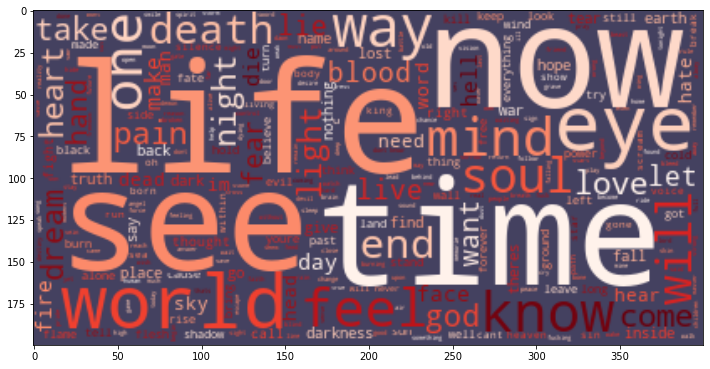

In [67]:
# Generate a word cloud image
stopwords = set(STOPWORDS)
# stopwords.add('new_line')
wordcloud = WordCloud(stopwords=stopwords, background_color="#444160",colormap="Reds", max_words=800).generate(" ".join(data["Lyrics"]))
plt.figure(figsize=(12,12))
plt.imshow(wordcloud, interpolation="bilinear")
plt.show()


In [ ]:
text_file = open("data.txt", "w")
 
#write string to file
text_file.write(Corpus)
 
#close file
text_file.close()

in the next ipynb we start from opening data.txt 